# Install Dependencies

In [7]:
!pip install scikit-learn
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install torch torchvision torchaudio
!pip install imbalanced-learn

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

# Load Data

In [3]:
base_path = './'
data_path = os.path.join(base_path, 'creditcard_2023.csv')
data_df = pd.read_csv(data_path)
data_df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


# Data Preprocessing

In [4]:
# Standardization features
columns_to_exclude = ["Class"]  # exclude columns that do not want to standardize
columns_to_scale = data_df.columns.difference(columns_to_exclude)
scalar = StandardScaler()
data_scaled = scalar.fit_transform(data_df[columns_to_scale])
data_scaled_df = pd.DataFrame(data_scaled, columns=columns_to_scale)  # convert back to dataframe
data_scaled_df = pd.concat([data_scaled_df, data_df[columns_to_exclude]], axis=1)  # concat classes back to standardized data
data_scaled_df

,Amount,V1,V10,V11,V12,V13,V14,V15,V16,V17,...,V28,V3,V4,V5,V6,V7,V8,V9,id,Class
0,0.858447,-0.260648,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,...,-0.151045,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,-1.732048,0
1,-0.796369,0.985100,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,...,-0.064512,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,-1.732042,0
2,-1.377011,-0.260272,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,...,-0.244718,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,-1.732036,0
3,-0.962119,-0.152152,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,...,0.048424,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,-1.732029,0
4,0.323285,-0.206820,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,...,0.419117,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,-1.732023,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-1.105231,-0.833437,-1.161847,1.430971,-1.330500,-1.580730,-1.363454,0.287766,-1.480796,-1.520928,...,0.081564,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,1.732023,1
568626,-1.067766,-0.670459,-0.210817,0.173590,-0.539948,0.738315,-0.812043,0.870447,-0.545184,-0.575991,...,1.704306,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,1.732029,1
568627,1.666401,-0.311997,-0.144495,0.477582,-0.461849,-0.606100,-0.395126,-0.040673,-0.370201,-0.729002,...,-0.268741,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,1.732036,1
568628,-0.271853,0.636871,-0.080078,-0.324934,0.335215,0.464177,-0.390369,0.893881,0.477402,0.848443,...,-0.076251,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,1.732042,1


# Drop Labels and split data for training

In [16]:
data_scaled_without_labels = data_scaled_df.drop(columns=['Class'])
data_labels = data_scaled_df['Class']

X_train, X_test, y_train, y_test =  train_test_split(data_scaled_without_labels, data_labels, test_size=0.2, random_state=42, stratify=data_labels)

print(X_train.shape)
# keep only non-fraud for training the Auto Encoder
X_train = X_train[y_train == 0]

print(X_train.shape)
print(X_test.shape)

(454904, 30)
(227452, 30)
(113726, 30)


In [17]:
y_train.value_counts()

Class
0    227452
1    227452
Name: count, dtype: int64

In [18]:
y_test.value_counts()

Class
1    56863
0    56863
Name: count, dtype: int64

# Define Auto Encoder

In [19]:
# Define Auto Encoder
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        # encode
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, encoding_dim),
            nn.ReLU(),
            nn.Linear(encoding_dim, int(encoding_dim / 2))
        )
        # decode
        self.decoder = nn.Sequential(
            nn.Linear(int(encoding_dim / 2), encoding_dim),
            nn.ReLU(),
            nn.Linear(encoding_dim, input_dim),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Train Auto Encoder with Non-Fraud Data

In [49]:
# Initialize model
input_dim = X_train.shape[1]
encoding_dim = 14
model = Autoencoder(input_dim, encoding_dim)

# Set loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Data Preparation
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
train_loader = DataLoader(TensorDataset(X_train_tensor), batch_size=64, shuffle=True)

# Set Fixed Random Seed
torch.manual_seed(42)

# Train Model
epochs = 100
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for batch in train_loader:
        inputs = batch[0]
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader):.4f}")


Epoch 1/100, Loss: 0.5118
Epoch 2/100, Loss: 0.4734
Epoch 3/100, Loss: 0.4712
Epoch 4/100, Loss: 0.4702
Epoch 5/100, Loss: 0.4693
Epoch 6/100, Loss: 0.4685
Epoch 7/100, Loss: 0.4674
Epoch 8/100, Loss: 0.4664
Epoch 9/100, Loss: 0.4654
Epoch 10/100, Loss: 0.4645
Epoch 11/100, Loss: 0.4637
Epoch 12/100, Loss: 0.4630
Epoch 13/100, Loss: 0.4614
Epoch 14/100, Loss: 0.4585
Epoch 15/100, Loss: 0.4580
Epoch 16/100, Loss: 0.4576
Epoch 17/100, Loss: 0.4571
Epoch 18/100, Loss: 0.4565
Epoch 19/100, Loss: 0.4557
Epoch 20/100, Loss: 0.4548
Epoch 21/100, Loss: 0.4538
Epoch 22/100, Loss: 0.4517
Epoch 23/100, Loss: 0.4512
Epoch 24/100, Loss: 0.4508
Epoch 25/100, Loss: 0.4506
Epoch 26/100, Loss: 0.4505
Epoch 27/100, Loss: 0.4503
Epoch 28/100, Loss: 0.4502
Epoch 29/100, Loss: 0.4501
Epoch 30/100, Loss: 0.4500
Epoch 31/100, Loss: 0.4499
Epoch 32/100, Loss: 0.4498
Epoch 33/100, Loss: 0.4498
Epoch 34/100, Loss: 0.4496
Epoch 35/100, Loss: 0.4495
Epoch 36/100, Loss: 0.4494
Epoch 37/100, Loss: 0.4493
Epoch 38/1

In [106]:
# Compute reconstruct error on Test Data
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
model.eval()
# compute reconstructed errors
reconstructed = model(X_test_tensor)
# compute MSE
reconstruction_errors = torch.mean((reconstructed - X_test_tensor) ** 2, axis=1).detach().numpy()
# assume 99.5% are not fraud according to the plot
threshold = np.percentile(reconstruction_errors, 60) 
# mark out outliers
outliers =  (reconstruction_errors > threshold).astype(int) # 1 means fraud

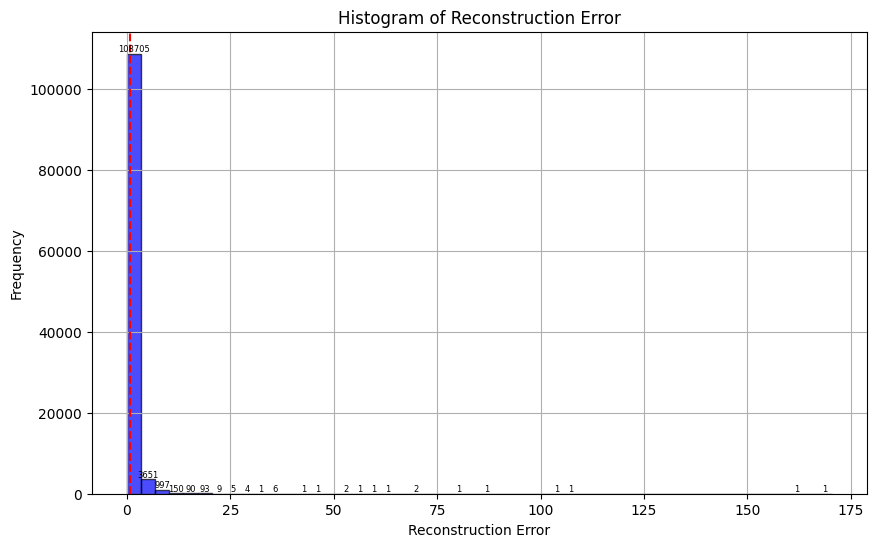

In [107]:
# Plot histogram
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(reconstruction_errors, bins=50, color='blue', edgecolor='black', alpha=0.7)

# display count for each error range
for i in range(len(patches)):
    height = patches[i].get_height()
    if height > 0:
        plt.text(patches[i].get_x() + patches[i].get_width()/2, height, f'{int(height)}', 
                 ha='center', va='bottom', fontsize=6)
        
# display fraud cut line
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold ({threshold:.2f})')

plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Reconstruction Error')
plt.grid(True)
plt.show()


In [108]:
c_matrix = confusion_matrix(outliers, y_test)
c_matrix

array([[51100, 17136],
       [ 5763, 39727]])

In [109]:
report = classification_report(outliers, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82     68236
           1       0.70      0.87      0.78     45490

    accuracy                           0.80    113726
   macro avg       0.80      0.81      0.80    113726
weighted avg       0.82      0.80      0.80    113726

